In [1]:
import pandas as pd

In [2]:
data = {
    "student_id": [101, 102, 103, 104, 105],
    "name": ["Alice", "Bob", "John", "Mary", "Leo"],
    "math_score": [78, 65, 90, 88, 55],
    "english_score": [82, 70, 85, 91, 60],
    "science_score": [80, 68, 92, 89, 58]
}

df = pd.DataFrame(data)
df

,student_id,name,math_score,english_score,science_score
0,101,Alice,78,82,80
1,102,Bob,65,70,68
2,103,John,90,85,92
3,104,Mary,88,91,89
4,105,Leo,55,60,58


In [3]:
df.head()

,student_id,name,math_score,english_score,science_score
0,101,Alice,78,82,80
1,102,Bob,65,70,68
2,103,John,90,85,92
3,104,Mary,88,91,89
4,105,Leo,55,60,58


In [4]:
df.tail()

,student_id,name,math_score,english_score,science_score
0,101,Alice,78,82,80
1,102,Bob,65,70,68
2,103,John,90,85,92
3,104,Mary,88,91,89
4,105,Leo,55,60,58


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   student_id     5 non-null      int64 
 1   name           5 non-null      object
 2   math_score     5 non-null      int64 
 3   english_score  5 non-null      int64 
 4   science_score  5 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 332.0+ bytes


In [8]:
df.shape

(5, 5)

In [9]:
df.columns

Index(['student_id', 'name', 'math_score', 'english_score', 'science_score'], dtype='object')

In [10]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [11]:
df.describe()

,student_id,math_score,english_score,science_score
count,5.000000,5.000000,5.000000,5.000000
mean,103.000000,75.200000,77.600000,77.400000
std,1.581139,15.023315,12.461942,14.310835
min,101.000000,55.000000,60.000000,58.000000
25%,102.000000,65.000000,70.000000,68.000000
50%,103.000000,78.000000,82.000000,80.000000
75%,104.000000,88.000000,85.000000,89.000000
max,105.000000,90.000000,91.000000,92.000000


In [12]:
df.sum()

student_id                       515
name             AliceBobJohnMaryLeo
math_score                       376
english_score                    388
science_score                    387
dtype: object

In [13]:
df

,student_id,name,math_score,english_score,science_score
0,101,Alice,78,82,80
1,102,Bob,65,70,68
2,103,John,90,85,92
3,104,Mary,88,91,89
4,105,Leo,55,60,58


In [20]:
total_score = df[['math_score', 'english_score', 'science_score']].sum(axis = 1)
print(total_score)

0    240
1    203
2    267
3    268
4    173
dtype: int64


In [28]:
df.groupby('name')[['math_score', 'english_score', 'science_score']].sum()

,math_score,english_score,science_score
name,,,
Alice,78,82,80
Bob,65,70,68
John,90,85,92
Leo,55,60,58
Mary,88,91,89


In [31]:
# to get the total score for each students

df['total_score'] = df['math_score'] + df['english_score'] + df['science_score']
df

,student_id,name,math_score,english_score,science_score,total_score
0,101,Alice,78,82,80,240
1,102,Bob,65,70,68,203
2,103,John,90,85,92,267
3,104,Mary,88,91,89,268
4,105,Leo,55,60,58,173


In [35]:
# average score for each students 

df['average'] = (df['total_score'] / 3).round(2)
df

,student_id,name,math_score,english_score,science_score,total_score,average
0,101,Alice,78,82,80,240,80.00
1,102,Bob,65,70,68,203,67.67
2,103,John,90,85,92,267,89.00
3,104,Mary,88,91,89,268,89.33
4,105,Leo,55,60,58,173,57.67


In [41]:
# a new column for status to check either pass or fail

df['status'] = ['pass' if score >= 60 else 'fail' for score in df['average']]
df

,student_id,name,math_score,english_score,science_score,total_score,average,status
0,101,Alice,78,82,80,240,80.00,pass
1,102,Bob,65,70,68,203,67.67,pass
2,103,John,90,85,92,267,89.00,pass
3,104,Mary,88,91,89,268,89.33,pass
4,105,Leo,55,60,58,173,57.67,fail


In [42]:
# a new column for status to check either pass or fail

df['status'] = df['average'].map(lambda score: 'pass'  if score >= 60 else 'fail')
df

,student_id,name,math_score,english_score,science_score,total_score,average,status
0,101,Alice,78,82,80,240,80.00,pass
1,102,Bob,65,70,68,203,67.67,pass
2,103,John,90,85,92,267,89.00,pass
3,104,Mary,88,91,89,268,89.33,pass
4,105,Leo,55,60,58,173,57.67,fail


In [45]:
# students ranking 

df_sorted = df.sort_values('average', ascending = False)
df_sorted

,student_id,name,math_score,english_score,science_score,total_score,average,status
3,104,Mary,88,91,89,268,89.33,pass
2,103,John,90,85,92,267,89.00,pass
0,101,Alice,78,82,80,240,80.00,pass
1,102,Bob,65,70,68,203,67.67,pass
4,105,Leo,55,60,58,173,57.67,fail


In [46]:
# class average 

df[['math_score', 'english_score', 'science_score']].mean()

math_score       75.2
english_score    77.6
science_score    77.4
dtype: float64

In [47]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'students score by subject'}, xlabel='name'>

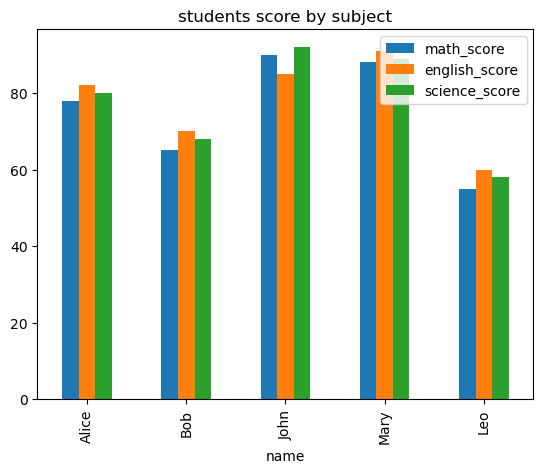

In [49]:
# simple visualization

df.plot(
    x = 'name',
    y = ['math_score', 'english_score', 'science_score'],
    title = 'students score by subject',
    kind = 'bar'  
)

In [51]:
df['avg'] = df['average'].apply(lambda score: 'pass' if score >= 60 else 'fail')
df

,student_id,name,math_score,english_score,science_score,total_score,average,status,avg
0,101,Alice,78,82,80,240,80.00,pass,pass
1,102,Bob,65,70,68,203,67.67,pass,pass
2,103,John,90,85,92,267,89.00,pass,pass
3,104,Mary,88,91,89,268,89.33,pass,pass
4,105,Leo,55,60,58,173,57.67,fail,fail


In [ ]:
"""
- mary has the overall average score 
- leo has the lowest average score, did poorly in maths and sciences 
- hence leo should put in more effort into these two courses and also in english too
- most students passed based on the 60 % rule and that is quite good
"""

In [54]:
# added grade to the students dataset

df['grade'] = df['average'].map(lambda score: 'A' if score >= 85 else
                                               'B' if score >= 70 else
                                                'C' if score >= 60
                                                else 'F'
                                                )
df

,student_id,name,math_score,english_score,science_score,total_score,average,status,avg,grade
0,101,Alice,78,82,80,240,80.00,pass,pass,B
1,102,Bob,65,70,68,203,67.67,pass,pass,C
2,103,John,90,85,92,267,89.00,pass,pass,A
3,104,Mary,88,91,89,268,89.33,pass,pass,A
4,105,Leo,55,60,58,173,57.67,fail,fail,F


In [60]:
df = df.drop('avg', axis = 1)
df

,student_id,name,math_score,english_score,science_score,total_score,average,status,grade
0,101,Alice,78,82,80,240,80.00,pass,B
1,102,Bob,65,70,68,203,67.67,pass,C
2,103,John,90,85,92,267,89.00,pass,A
3,104,Mary,88,91,89,268,89.33,pass,A
4,105,Leo,55,60,58,173,57.67,fail,F
